# Hermite Polynomials

## Introduction

Hermite polynomials are a classical orthogonal polynomial sequence that arise naturally in probability theory, combinatorics, and physics—most notably as the eigenfunctions of the quantum harmonic oscillator.

There are two standard normalizations:

### Physicist's Hermite Polynomials $H_n(x)$

These satisfy the differential equation:

$$H_n''(x) - 2x H_n'(x) + 2n H_n(x) = 0$$

They are orthogonal with respect to the weight function $w(x) = e^{-x^2}$:

$$\int_{-\infty}^{\infty} H_m(x) H_n(x) e^{-x^2} dx = \sqrt{\pi} \, 2^n \, n! \, \delta_{mn}$$

### Probabilist's Hermite Polynomials $He_n(x)$

These satisfy:

$$He_n''(x) - x \, He_n'(x) + n \, He_n(x) = 0$$

with orthogonality under the standard Gaussian weight $w(x) = e^{-x^2/2}$:

$$\int_{-\infty}^{\infty} He_m(x) He_n(x) e^{-x^2/2} dx = \sqrt{2\pi} \, n! \, \delta_{mn}$$

The two are related by:

$$H_n(x) = 2^{n/2} He_n(x\sqrt{2})$$

## Explicit Formulas

### Rodrigues Formula

$$H_n(x) = (-1)^n e^{x^2} \frac{d^n}{dx^n} e^{-x^2}$$

### Recurrence Relation

$$H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x)$$

with initial conditions $H_0(x) = 1$ and $H_1(x) = 2x$.

### Explicit Sum Formula

$$H_n(x) = n! \sum_{k=0}^{\lfloor n/2 \rfloor} \frac{(-1)^k}{k!(n-2k)!} (2x)^{n-2k}$$

## Applications

1. **Quantum Mechanics**: The wave functions of the quantum harmonic oscillator are:
   $$\psi_n(x) = \frac{1}{\sqrt{2^n n!}} \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} e^{-\frac{m\omega x^2}{2\hbar}} H_n\left(\sqrt{\frac{m\omega}{\hbar}} x\right)$$

2. **Probability Theory**: Hermite polynomials form a complete orthogonal system for expanding functions of Gaussian random variables.

3. **Signal Processing**: Used in Hermite function expansions for analyzing signals.

/tmp/ipykernel_155886/2658568945.py:94: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  inner_products[m, n] = np.trapz(integrand, x_int)


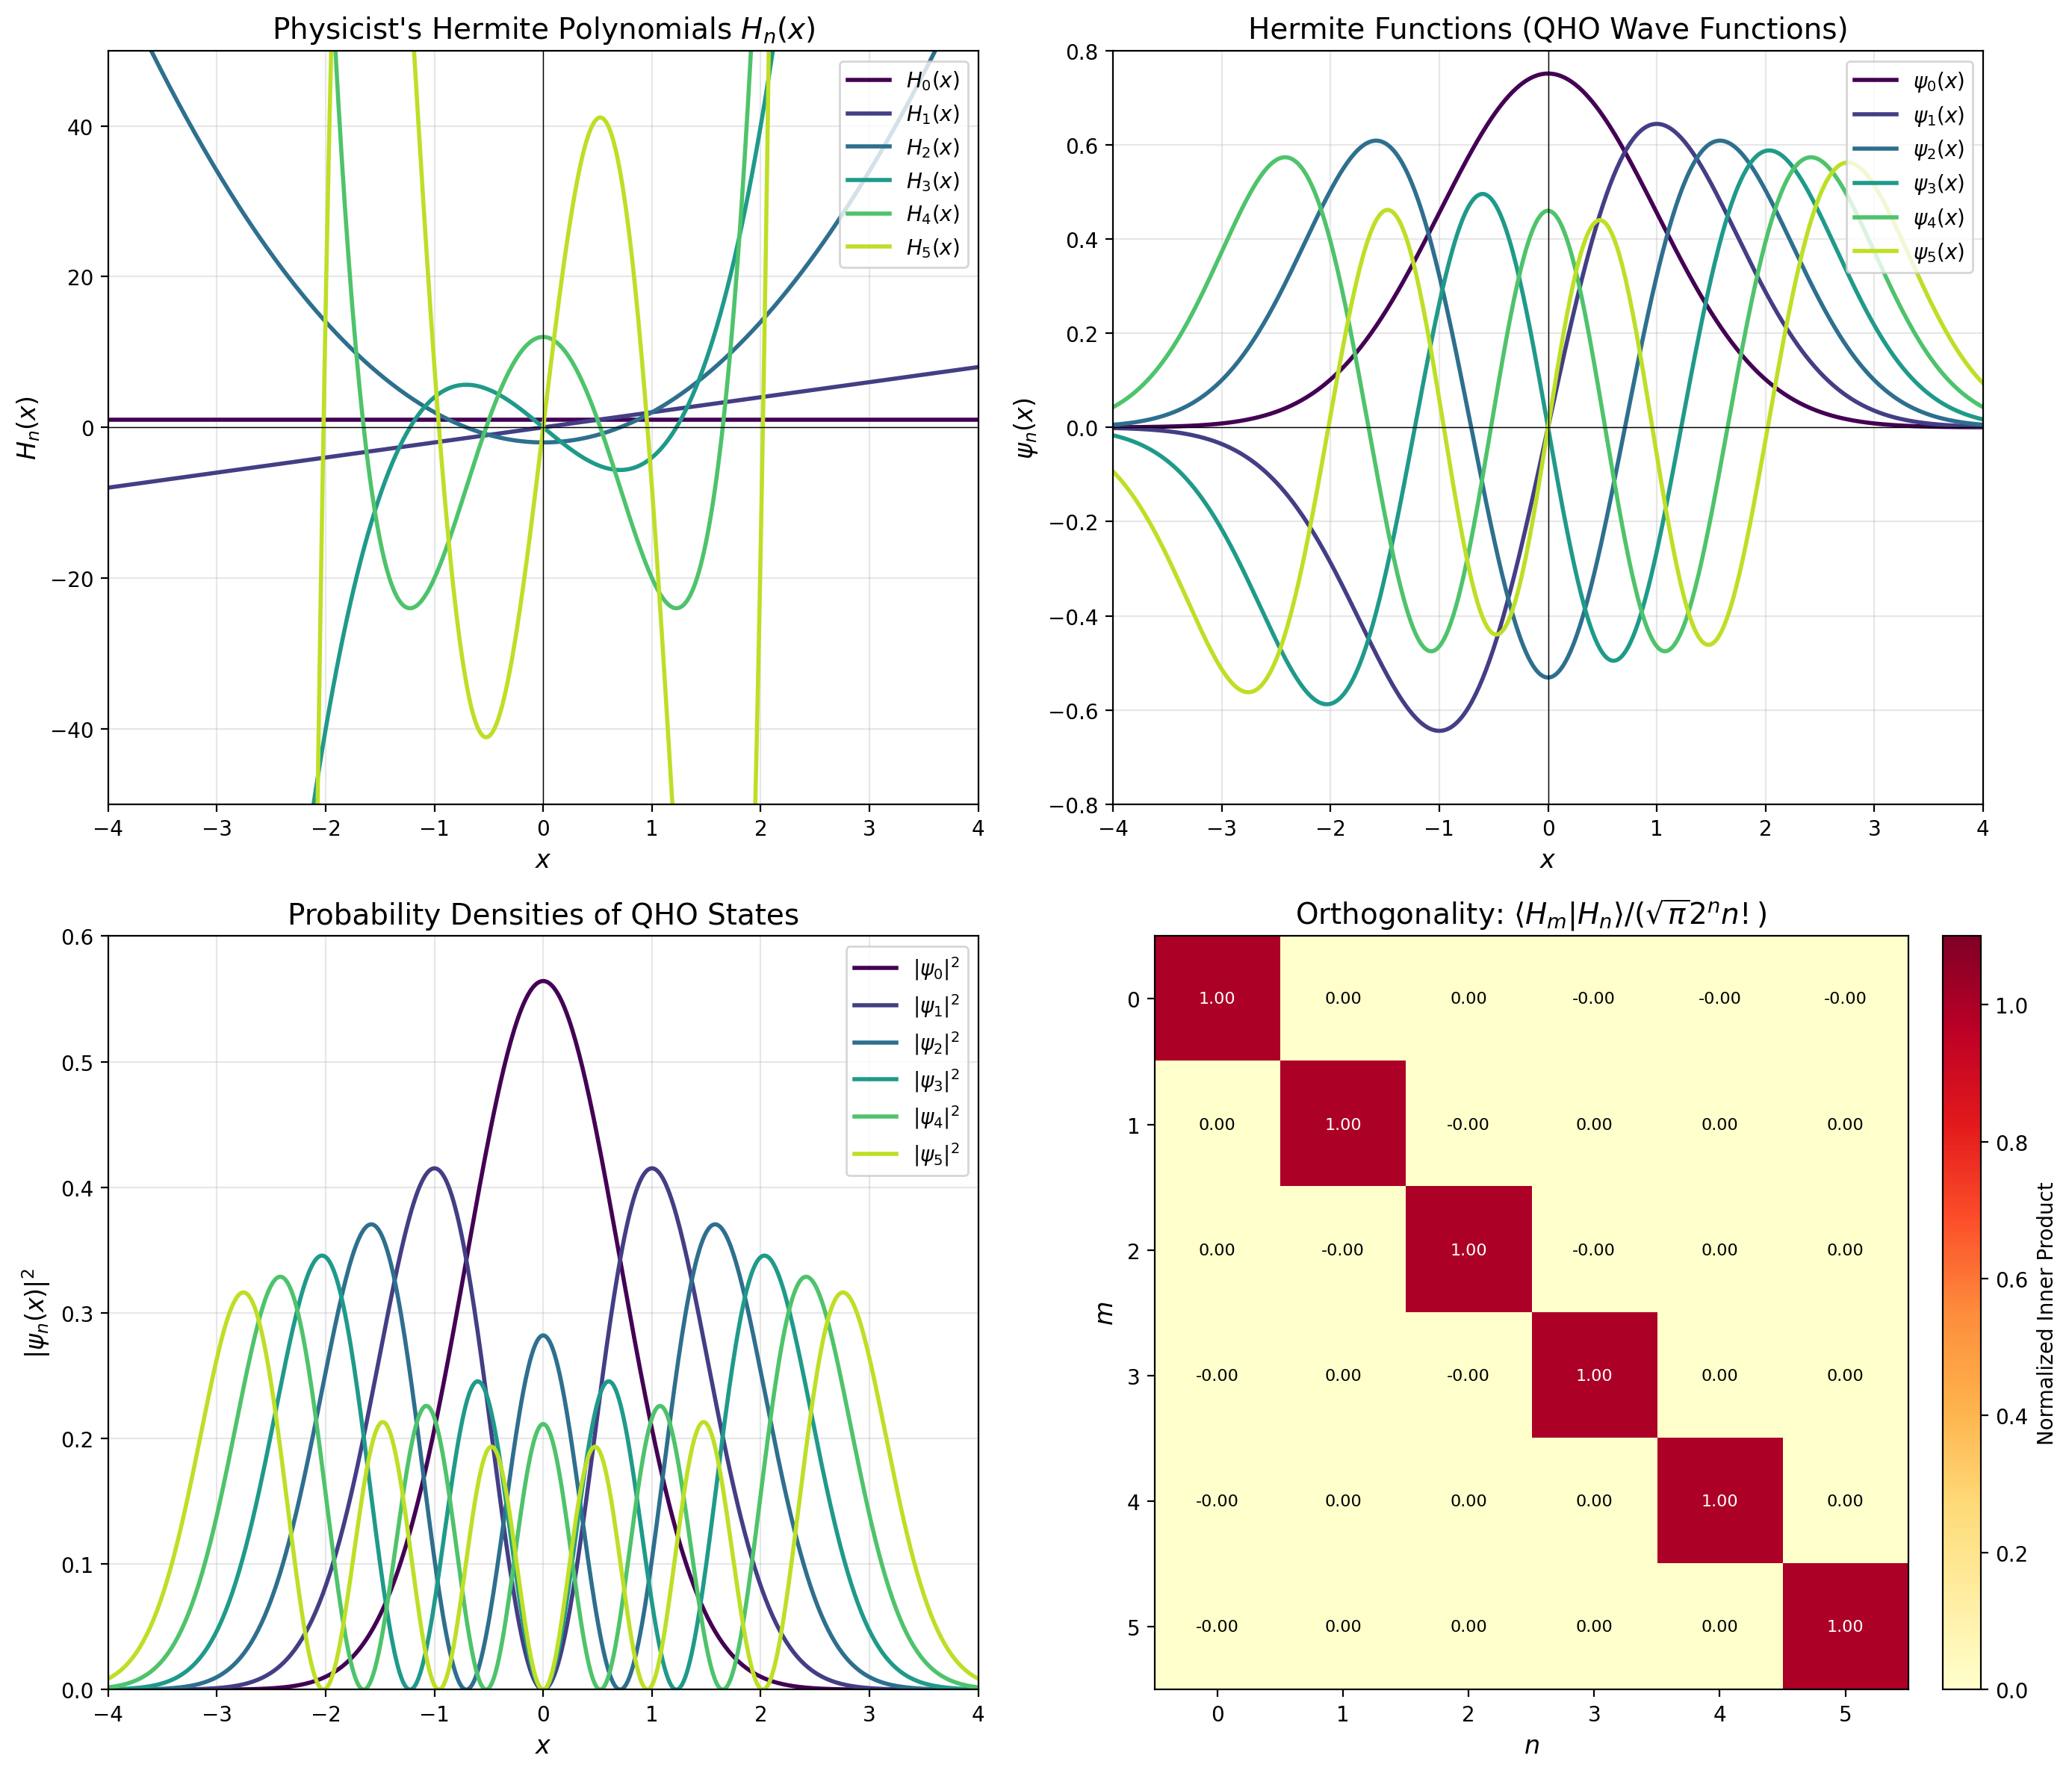

Plot saved to 'plot.png'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial
from numpy.polynomial.hermite import hermval

# Set up the figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Domain for plotting
x = np.linspace(-4, 4, 500)

# =============================================================================
# Plot 1: First six Hermite polynomials
# =============================================================================
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 0.9, 6))

for n in range(6):
    # Get Hermite polynomial coefficients (physicist's convention)
    Hn = hermite(n)
    y = Hn(x)
    ax1.plot(x, y, color=colors[n], linewidth=2, label=f'$H_{n}(x)$')

ax1.set_xlim(-4, 4)
ax1.set_ylim(-50, 50)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$H_n(x)$', fontsize=12)
ax1.set_title("Physicist's Hermite Polynomials $H_n(x)$", fontsize=14)
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# =============================================================================
# Plot 2: Hermite functions (quantum harmonic oscillator wave functions)
# =============================================================================
ax2 = axes[0, 1]

def hermite_function(n, x):
    """Normalized Hermite function (QHO wave function with m=omega=hbar=1)"""
    Hn = hermite(n)
    norm = 1.0 / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))
    return norm * np.exp(-x**2 / 2) * Hn(x)

for n in range(6):
    psi = hermite_function(n, x)
    ax2.plot(x, psi, color=colors[n], linewidth=2, label=f'$\\psi_{n}(x)$')

ax2.set_xlim(-4, 4)
ax2.set_ylim(-0.8, 0.8)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$\\psi_n(x)$', fontsize=12)
ax2.set_title('Hermite Functions (QHO Wave Functions)', fontsize=14)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

# =============================================================================
# Plot 3: Probability densities |psi_n(x)|^2
# =============================================================================
ax3 = axes[1, 0]

for n in range(6):
    psi = hermite_function(n, x)
    prob_density = psi**2
    ax3.plot(x, prob_density, color=colors[n], linewidth=2, label=f'$|\\psi_{n}|^2$')

ax3.set_xlim(-4, 4)
ax3.set_ylim(0, 0.6)
ax3.set_xlabel('$x$', fontsize=12)
ax3.set_ylabel('$|\\psi_n(x)|^2$', fontsize=12)
ax3.set_title('Probability Densities of QHO States', fontsize=14)
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(True, alpha=0.3)

# =============================================================================
# Plot 4: Verification of orthogonality via numerical integration
# =============================================================================
ax4 = axes[1, 1]

# Compute inner products <H_m | H_n> with weight e^{-x^2}
n_max = 6
inner_products = np.zeros((n_max, n_max))
x_int = np.linspace(-10, 10, 2000)  # Extended domain for integration
dx = x_int[1] - x_int[0]

for m in range(n_max):
    Hm = hermite(m)
    for n in range(n_max):
        Hn = hermite(n)
        # Compute integral of H_m(x) * H_n(x) * exp(-x^2)
        integrand = Hm(x_int) * Hn(x_int) * np.exp(-x_int**2)
        inner_products[m, n] = np.trapz(integrand, x_int)

# Normalize by the expected value for visualization
normalized = inner_products.copy()
for n in range(n_max):
    expected = np.sqrt(np.pi) * 2**n * factorial(n)
    normalized[:, n] /= expected

im = ax4.imshow(np.abs(normalized), cmap='YlOrRd', aspect='equal', 
                vmin=0, vmax=1.1)
ax4.set_xticks(range(n_max))
ax4.set_yticks(range(n_max))
ax4.set_xlabel('$n$', fontsize=12)
ax4.set_ylabel('$m$', fontsize=12)
ax4.set_title('Orthogonality: $\\langle H_m | H_n \\rangle / (\\sqrt{\\pi} 2^n n!)$', fontsize=14)
cbar = plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
cbar.set_label('Normalized Inner Product', fontsize=10)

# Add text annotations
for m in range(n_max):
    for n in range(n_max):
        val = normalized[m, n]
        color = 'white' if np.abs(val) > 0.5 else 'black'
        ax4.text(n, m, f'{val:.2f}', ha='center', va='center', 
                fontsize=8, color=color)

plt.tight_layout()
plt.savefig('hermite_polynomials_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Results and Discussion

The visualizations above demonstrate key properties of Hermite polynomials:

### Panel 1: Hermite Polynomials
The physicist's Hermite polynomials $H_n(x)$ show:
- $H_n(x)$ has exactly $n$ real zeros
- Even-indexed polynomials are even functions; odd-indexed are odd functions
- The amplitude grows rapidly with $n$ (note the leading coefficient is $2^n$)

### Panel 2: Hermite Functions
When multiplied by the Gaussian envelope $e^{-x^2/2}$ and normalized, we obtain the Hermite functions $\psi_n(x)$:
- These are the energy eigenstates of the quantum harmonic oscillator
- The Gaussian factor ensures the functions are square-integrable
- Higher $n$ states have more nodes and spread further from the origin

### Panel 3: Probability Densities
The probability densities $|\psi_n(x)|^2$ show:
- The ground state ($n=0$) is a Gaussian centered at the origin
- Excited states develop $n$ nodes where the probability vanishes
- The classical turning points (where kinetic energy equals total energy) correspond to the outer peaks

### Panel 4: Orthogonality
The matrix of inner products verifies the orthogonality relation:
- Diagonal elements equal 1 (after normalization)
- Off-diagonal elements are numerically zero
- This confirms $\int_{-\infty}^{\infty} H_m(x) H_n(x) e^{-x^2} dx = \sqrt{\pi} 2^n n! \delta_{mn}$

In [2]:
# Demonstrate the recurrence relation
print("Verification of Recurrence Relation: H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x)")
print("="*70)

x_test = np.array([0.5, 1.0, 2.0])

for n in range(1, 5):
    Hn_minus1 = hermite(n-1)
    Hn = hermite(n)
    Hn_plus1 = hermite(n+1)
    
    # Compute both sides of recurrence
    lhs = Hn_plus1(x_test)
    rhs = 2*x_test*Hn(x_test) - 2*n*Hn_minus1(x_test)
    
    print(f"\nn = {n}:")
    for i, x_val in enumerate(x_test):
        print(f"  x = {x_val}: H_{n+1}({x_val}) = {lhs[i]:.6f}, "
              f"2x·H_{n}({x_val}) - 2n·H_{n-1}({x_val}) = {rhs[i]:.6f}")

Verification of Recurrence Relation: H_{n+1}(x) = 2x H_n(x) - 2n H_{n-1}(x)

n = 1:
  x = 0.5: H_2(0.5) = -1.000000, 2x·H_1(0.5) - 2n·H_0(0.5) = -1.000000
  x = 1.0: H_2(1.0) = 2.000000, 2x·H_1(1.0) - 2n·H_0(1.0) = 2.000000
  x = 2.0: H_2(2.0) = 14.000000, 2x·H_1(2.0) - 2n·H_0(2.0) = 14.000000

n = 2:
  x = 0.5: H_3(0.5) = -5.000000, 2x·H_2(0.5) - 2n·H_1(0.5) = -5.000000
  x = 1.0: H_3(1.0) = -4.000000, 2x·H_2(1.0) - 2n·H_1(1.0) = -4.000000
  x = 2.0: H_3(2.0) = 40.000000, 2x·H_2(2.0) - 2n·H_1(2.0) = 40.000000

n = 3:
  x = 0.5: H_4(0.5) = 1.000000, 2x·H_3(0.5) - 2n·H_2(0.5) = 1.000000
  x = 1.0: H_4(1.0) = -20.000000, 2x·H_3(1.0) - 2n·H_2(1.0) = -20.000000
  x = 2.0: H_4(2.0) = 76.000000, 2x·H_3(2.0) - 2n·H_2(2.0) = 76.000000

n = 4:
  x = 0.5: H_5(0.5) = 41.000000, 2x·H_4(0.5) - 2n·H_3(0.5) = 41.000000
  x = 1.0: H_5(1.0) = -8.000000, 2x·H_4(1.0) - 2n·H_3(1.0) = -8.000000
  x = 2.0: H_5(2.0) = -16.000000, 2x·H_4(2.0) - 2n·H_3(2.0) = -16.000000


In [3]:
# Compute and display the first few Hermite polynomials explicitly
print("First Six Hermite Polynomials (Explicit Forms):")
print("="*50)

explicit_forms = [
    "H_0(x) = 1",
    "H_1(x) = 2x",
    "H_2(x) = 4x² - 2",
    "H_3(x) = 8x³ - 12x",
    "H_4(x) = 16x⁴ - 48x² + 12",
    "H_5(x) = 32x⁵ - 160x³ + 120x"
]

for form in explicit_forms:
    print(form)

print("\nVerification at x = 1:")
print("-"*30)
x_val = 1.0
expected = [1, 2, 2, -4, -20, -8]

for n in range(6):
    Hn = hermite(n)
    computed = Hn(x_val)
    print(f"H_{n}(1) = {computed:.1f} (expected: {expected[n]})")

First Six Hermite Polynomials (Explicit Forms):
H_0(x) = 1
H_1(x) = 2x
H_2(x) = 4x² - 2
H_3(x) = 8x³ - 12x
H_4(x) = 16x⁴ - 48x² + 12
H_5(x) = 32x⁵ - 160x³ + 120x

Verification at x = 1:
------------------------------
H_0(1) = 1.0 (expected: 1)
H_1(1) = 2.0 (expected: 2)
H_2(1) = 2.0 (expected: 2)
H_3(1) = -4.0 (expected: -4)
H_4(1) = -20.0 (expected: -20)
H_5(1) = -8.0 (expected: -8)
